In [2]:
import pandas as pd
df=pd.read_csv('c:/data/pima/data.csv')

In [3]:
X=df[df.columns[0:-1]]
y=df['outcome']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X_train, y_train)
print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

1.0
0.7662337662337663


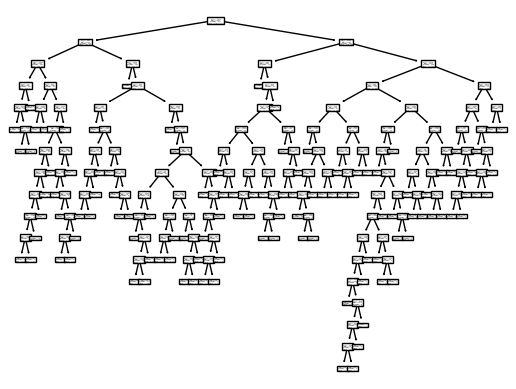

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(model1)
plt.show()

0.7638436482084691
0.7597402597402597


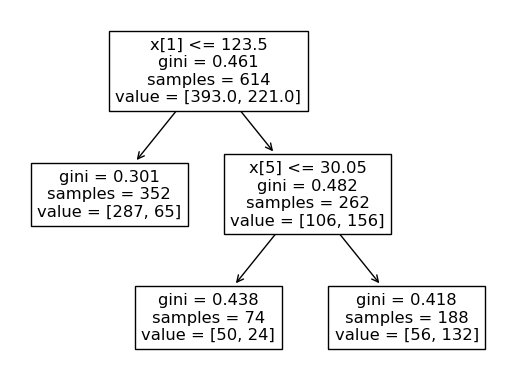

In [8]:
# max_leaf_nodes : leaf node(자식 노드가 없는 노드)의 최대 개수
# min_samples_leaf : leaf node가 되기 위한 최소한의 샘플 개수
# min_samples_split : 노드가 분기할 수 있는 최소 샘플 개수

model2 = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

tree.plot_tree(model2)
plt.show()

0.7736156351791531
0.7792207792207793


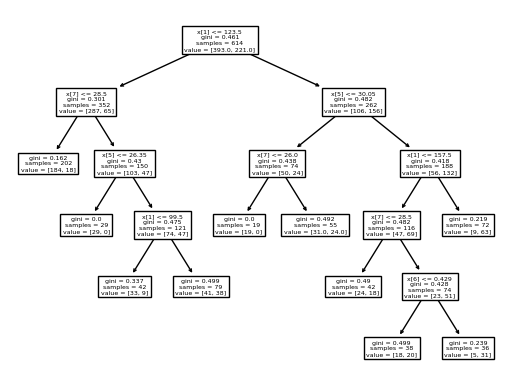

In [9]:
model3 = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
model3.fit(X_train, y_train)
print(model3.score(X_train, y_train))
print(model3.score(X_test, y_test))

tree.plot_tree(model3)
plt.show()

In [10]:
from sklearn.tree import export_text

# 의사결정나무 모형에서 도출한 규칙들을 텍스트로 출력
tree_rules = export_text(model2, feature_names=list(X_train.columns))
print(tree_rules)

|--- glucose <= 123.50
|   |--- class: 0
|--- glucose >  123.50
|   |--- bmi <= 30.05
|   |   |--- class: 0
|   |--- bmi >  30.05
|   |   |--- class: 1



In [11]:
# tree_ : 트리의 루트 노드
n_nodes = model2.tree_.node_count
print("전체 노드 개수: ", n_nodes)

threshold = model2.tree_.threshold
print("노드의 임계값: ", threshold)

전체 노드 개수:  5
노드의 임계값:  [123.5         -2.          30.05000019  -2.          -2.        ]
